# Linear Regression using Gradient Descent

In this notebook, we implement linear regression from scratch using gradient descent. The goal is to predict the salary based on years of experience.

## 1. Import Required Libraries

Import the requied libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Load and Preprocess the Data

Load the dataset and convert the relevant columns to NumPy arrays.

In [2]:
# Load the dataset
data = pd.read_csv('Salary_dataset.csv')

# Convert to numpy array
x_train = data['YearsExperience'].to_numpy(dtype=float)   #features
y_train = data['Salary'].to_numpy(dtype=int)  # target values
length = len(x_train)    # length of the numpy array
print(f"Length of data: {length}")

Length of data: 30


## 3. Initial Setup

We initialize weights and bias with arbitrary values.
* Weight(w): Determines the slope of the regression line.
* Bias(b): Determines the intercept of the regression line.

In [3]:
# Set initial values for the weights and bias
w_initial = 1000
b_initial = 1000

## 4. Define Key Functions

### a. Predicted Value (Hypothesis)
The hypothesis for linear regression is given by: $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$


In [4]:
# Function to calculate f_wb = w * x + b
def compute_f_wb(w, x, b):
    f_wb = (w * x) + b  # predicted values
    return f_wb

### b. Cost Function

The cost function measures how far our predictions are from the actual values. For linear regression, it is given by the Mean Squared Error (MSE):
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$

In [5]:
# Function to calculate the cost
def compute_cost(y, f_wb, length):
    cost = np.mean(np.square(f_wb - y)) / 2
    return cost

### c. Compute Gradients

Gradients for weight and bias are derived from the cost function:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{3}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{4}\\
\end{align}
$$

In [6]:
# Function to calculate the gradient
def compute_gradient(x, y, f_wb, length):
    error = f_wb - y
    dj_dw = np.sum(error * x) / length
    dj_db = np.sum(error) / length
    return dj_dw, dj_db

## 5. Visualization of Data

We can plot the data to visualize the initial predictions and actual data points.

In [7]:
# Function to draw the graph
def draw_function(x, y, f_wb):
    plt.scatter(x, y, label="Actual Data", color='red', marker='o')
    plt.plot(x, f_wb, label="Prediction Line", color='blue')
    plt.title("Salary vs Experience")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.legend()
    plt.grid(True)
    plt.show()

## 6. Gradient Descent Implementation

Gradient Descent updates weights and bias iteratively:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{5}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

where $\alpha$ is the learning rate.

In [8]:
# Function to perform gradient descent
def gradient_descent(x, y, w, b, f_wb, length, alpha, tolerance=1e-6, max_iterations=100000):
    prev_cost = float('inf')
    for i in range(max_iterations):
        dj_dw, dj_db = compute_gradient(x, y, f_wb, length)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        f_wb = compute_f_wb(w, x, b)
        cost = compute_cost(y, f_wb, length)
        if abs(prev_cost - cost) < tolerance:
            break
        prev_cost = cost
    return w, b, f_wb

## 7. Compute the Initial cost

We calculate the initial cost to evaluate the fit of initial parameters.

In [9]:
f_wb = compute_f_wb(w_initial, x_train, b_initial)
cost_initial = compute_cost(y_train, f_wb, length)  # initial cost
print(f"Initial cost: {cost_initial}")

Initial cost: 2715003225.5333333


## 8. Plot the Initial Condition

Plotting gives a great idea of the data.

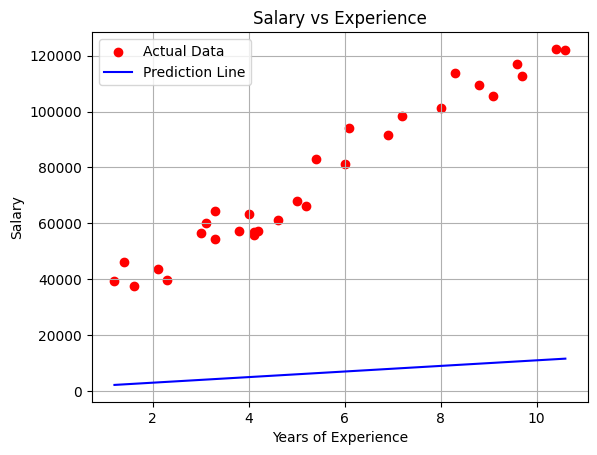

In [10]:
draw_function(x_train, y_train, f_wb)   # initial condition

## 9. Coefficient of Determination (R²)

R² evaluates the goodness of fit for the model:

Where:
$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}} \tag{6}
$$

In [11]:
# Function to calculate the goodness of fit (R^2)
def compute_r2(y, f_wb):
    y_mean = np.mean(y)
    ss_total = np.sum((y - y_mean) ** 2)
    ss_residual = np.sum((y - f_wb) ** 2)
    r = 1 - (ss_residual / ss_total)
    return r

## 10. Perform the Calculations

Perform Gradient Descent and Evaluate the model and draw a graph to check the fit of the data.

w: 9449.969374788616, b: 24848.15590852316
The final cost is: 15635475.861382898
Coefficient of Determination (R²): 0.9569566641428412


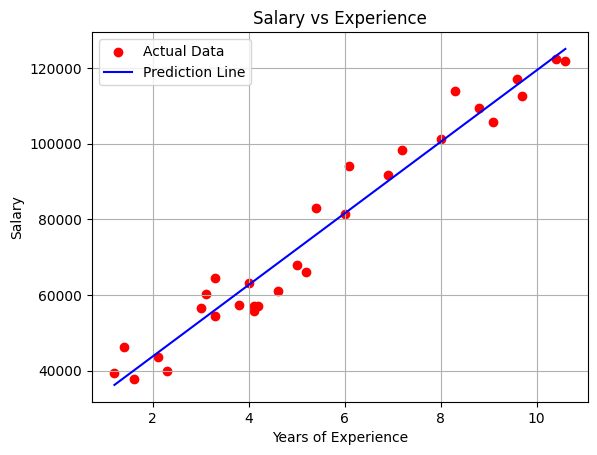

In [12]:
# Initial Parameters
alpha = 0.01  # Learning rate
tolerance = 1e-6
max_iterations = 10000

# Gradient Descent
w, b, f_wb = gradient_descent(x_train, y_train, w_initial, b_initial, f_wb, length, alpha, tolerance, max_iterations)

# Compute Final Cost and R^2
cost = compute_cost(y_train, f_wb, length)
r2 = compute_r2(y_train, f_wb)

# Output Results
print(f"w: {w}, b: {b}")
print(f"The final cost is: {cost}")
print(f"Coefficient of Determination (R²): {r2}")

# Plot Final Results
draw_function(x_train, y_train, f_wb)

## 11. Make Predictions

Now we are ready to make predictions from the linear model.

In [13]:
# Predict the values
years_of_experience = 11
predicted_salary = w * years_of_experience + b
print(f"Predicted Salary: {predicted_salary}")

Predicted Salary: 128797.81903119793
